In [2]:
import pandas as pd
import plotly.express as px
import numpy as np
import tikzplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../data/wandb_export_2023-06-19T18_25_34.882+02_00.csv")

In [4]:
df["vocabulary_size"].fillna(5000, inplace=True)
df["training_examples"].value_counts()

560.0    17
291.0     2
464.0     2
144.0     1
224.0     1
175.0     1
305.0     1
13.0      1
52.0      1
57.0      1
308.0     1
186.0     1
237.0     1
226.0     1
143.0     1
228.0     1
229.0     1
352.0     1
344.0     1
342.0     1
285.0     1
298.0     1
290.0     1
110.0     1
Name: training_examples, dtype: int64

In [5]:
df["vocabulary_size"].value_counts()

5000.0    59
1000.0     3
2000.0     1
1500.0     1
500.0      1
Name: vocabulary_size, dtype: int64

In [6]:
# round training samples to 100s
df["training_examples_round"] = df["training_examples"].apply(lambda x: round(x, -2))
df

,Name,State,Notes,User,Tags,Created,Runtime,Sweep,batch_size,learning_rate_multiplier,...,classification_report,cost,f1,model_id,precision,recall,target,training_examples,vocabulary_size,training_examples_round
0,copper-sun-70,finished,-,ebergerdev,NaN,2023-06-07T08:25:43.000Z,537,NaN,7.0,NaN,...,NaN,0.06,0.602020,ada:ft-personal-2023-06-07-08-33-56,0.640085,0.591372,100,144.0,5000.0,100.0
1,balmy-water-69,finished,-,ebergerdev,NaN,2023-06-07T07:50:15.000Z,584,NaN,7.0,NaN,...,NaN,0.12,0.765884,ada:ft-personal-2023-06-07-07-59-24,0.815476,0.746843,100,143.0,5000.0,100.0
2,dandy-vortex-68,finished,-,ebergerdev,NaN,2023-06-07T07:45:00.000Z,35,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Abteilung Label,NaN,5000.0,NaN
3,jumping-monkey-67,failed,-,ebergerdev,NaN,2023-05-24T14:36:16.000Z,1030,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Abteilung Label,NaN,5000.0,NaN
4,revived-wave-66,failed,-,ebergerdev,NaN,2023-05-24T14:34:26.000Z,97,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Abteilung Label,NaN,5000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,brisk-tree-7,failed,-,ebergerdev,NaN,2023-04-24T13:03:26.000Z,8,NaN,0.2,0.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.0,NaN
61,kind-eon-4,finished,-,ebergerdev,NaN,2023-04-24T11:13:27.000Z,2995,NaN,0.2,0.1,...,NaN,NaN,0.725749,ada:ft-personal-2023-04-24-12-00-13,0.729167,0.722727,NaN,305.0,5000.0,300.0
62,clean-snowflake-3,finished,-,ebergerdev,NaN,2023-04-24T10:13:17.000Z,2353,NaN,0.2,0.1,...,NaN,NaN,0.804444,ada:ft-personal-2023-04-24-10-37-46,0.833333,0.788095,NaN,175.0,5000.0,200.0
63,quiet-leaf-2,finished,-,ebergerdev,NaN,2023-04-24T09:58:52.000Z,20,NaN,0.2,0.1,...,NaN,NaN,0.611111,ada:ft-personal-2023-04-24-08-50-36,0.611111,0.611111,NaN,110.0,5000.0,100.0


In [7]:
# Test Coverage
df_1 = df[["n_epochs", "training_examples_round", "batch_size", "learning_rate_multiplier"]]
df_1[["n_epochs", "training_examples_round", "batch_size"]].value_counts().reset_index(name='count')

,n_epochs,training_examples_round,batch_size,count
0,32.0,300.0,0.2,6
1,32.0,200.0,0.2,4
2,16.0,100.0,0.2,3
3,16.0,200.0,0.2,3
4,16.0,300.0,0.2,3
5,16.0,600.0,0.2,3
6,16.0,600.0,56.0,3
7,16.0,600.0,28.0,2
8,16.0,600.0,112.0,2
9,8.0,100.0,7.0,1


# Accuracy vs. number of epochs

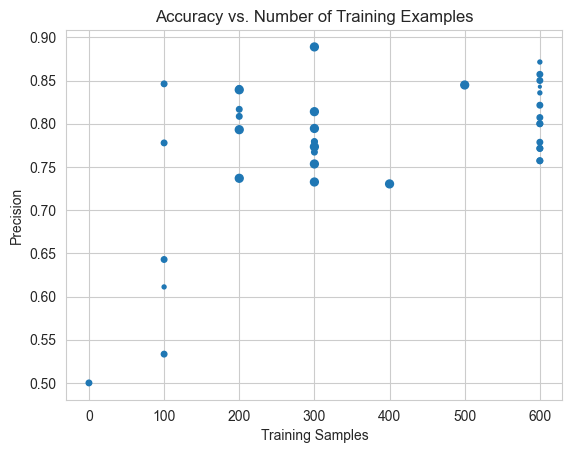

In [9]:
df_1 = df[
    (df["vocabulary_size"] >= 1000) &
    (df["training_examples"] >= 5) &
    (df["State"].str.contains("finished")) &
    (df["precision"] > 0)
]
fig = df_1.plot.scatter(x="training_examples_round", y="accuracy", s="n_epochs", xlabel="Training Samples", ylabel="Precision", title="Accuracy vs. Number of Training Examples").get_figure()

# save as svg
fig.savefig("plots/accuracy_vs_training_examples.png", dpi=300)
tikzplotlib.save("plots/accuracy_vs_training_examples.tex")

In [36]:
df["vocabulary_size_scaled"] = df["vocabulary_size"].apply(lambda x: x / 500)

/Users/eliasberger/Documents/Uni/Masterthesis/ticketclassification/venv/lib/python3.9/site-packages/tikzplotlib/_path.py:123: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  dd_strings = np.array([[fmt.format(val) for val in row] for row in dd])


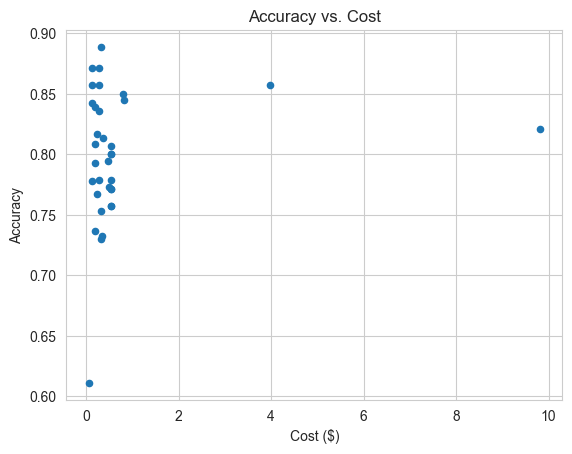

In [9]:
df_1 = df[
    (df["vocabulary_size"] >= 1000) &
    (df["training_examples"] >= 5) &
    (df["State"].str.contains("finished")) &
    (df["accuracy"] > 0.6)

]
fig = df_1.plot.scatter(x="cost", y="accuracy", xlabel="Cost ($)", ylabel="Accuracy", title="Accuracy vs. Cost").get_figure()

# save as svg
fig.savefig("plots/accuracy_vs_cost.svg")
tikzplotlib.save("plots/accuracy_vs_cost.tex")

/var/folders/bq/l2q_cb9j6bj21nlxmzykz44r0000gn/T/ipykernel_5819/1209962803.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["batch_size"].dropna(inplace=True)


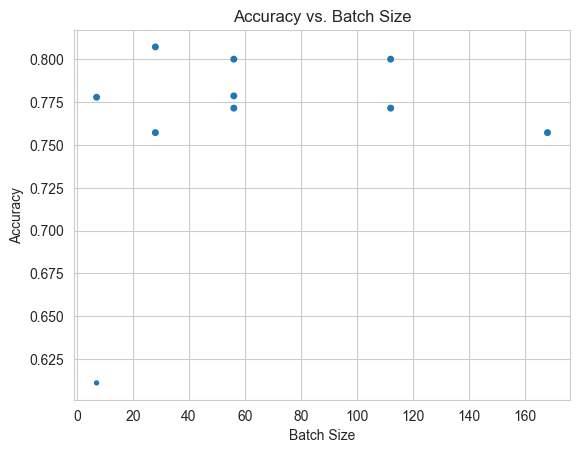

In [16]:
df_1 = df[
    (df["vocabulary_size"] >= 1000) &
    (df["training_examples"] >= 5) &
    (df["State"].str.contains("finished")) &
    (df["batch_size"] >= 1)
]

df_1["batch_size"].dropna(inplace=True)

fig = df_1.plot.scatter(x="batch_size", y="accuracy", s="n_epochs", xlabel="Batch Size", ylabel="Accuracy", title="Accuracy vs. Batch Size").get_figure()

# save as svg
fig.savefig("plots/accuracy_vs_batch_size.svg")
tikzplotlib.save("plots/accuracy_vs_batch_size.tex")

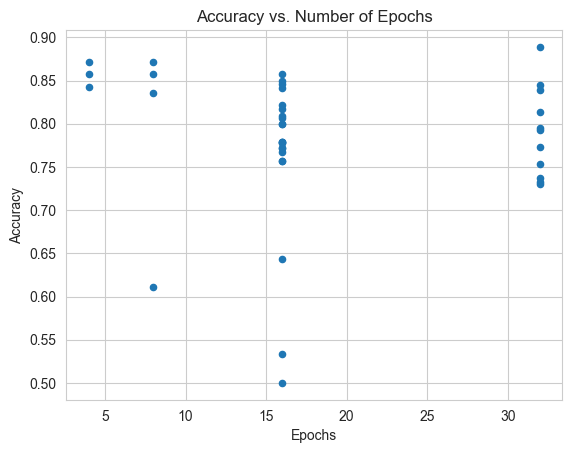

In [19]:
df_1 = df[
    (df["vocabulary_size"] >= 1000) &
    (df["training_examples"] >= 5) &
    (df["State"].str.contains("finished"))
]


fig = df_1.plot.scatter(x="n_epochs", y="accuracy", xlabel="Epochs", ylabel="Accuracy", title="Accuracy vs. Number of Epochs").get_figure()

# save as svg
fig.savefig("plots/accuracy_vs_n_epochs.svg")
tikzplotlib.save("plots/accuracy_vs_n_epochs.tex")